In [1]:
#!/usr/bin/env python
%matplotlib inline
import numpy as np
import heapq
from hmmlearn.hmm import GaussianHMM
import pickle
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

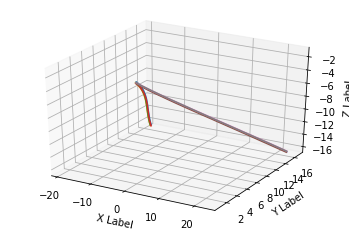

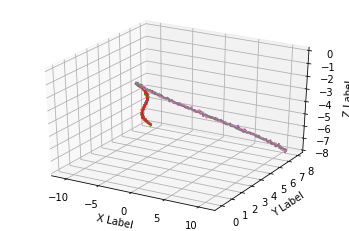

In [2]:
#System parameters 1/2
duration = 100
tau = 0.04
init_position = [2,1,-1]
scale = 1


t = np.linspace(0,(duration-1)*tau,duration)
x = ((t**4)/12 - 2*(t**3)/3)*scale + init_position[0]
y = (t**2) + init_position[1]
z = -(t**2) + init_position[2]
mx = -x + 2*init_position[0]
my = y
mz = z
v_x = ((t**3)/3 - 2*(t**2))*scale
v_y = 2*t
v_z = -2*t
v_mx = -v_x*scale
v_my = v_y
v_mz = v_z



v_x2 = v_x + np.random.normal(0,0.05,duration)
v_y2 = v_y - np.random.normal(0,0.05,duration)
v_z2 = v_z + np.random.normal(0,0.05,duration)
x2 = [init_position[0] + np.random.normal(0,0.05)]
y2 = [init_position[1] + np.random.normal(0,0.05)]
z2 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    x2.append(v_x2[i]*tau + x2[i])
    y2.append(v_y2[i]*tau + y2[i])
    z2.append(v_z2[i]*tau + z2[i])

v_x3 = v_x + np.random.normal(0,0.05,duration)
v_y3 = v_y + np.random.normal(0,0.05,duration)
v_z3 = v_z - np.random.normal(0,0.05,duration)
x3 = [init_position[0] + np.random.normal(0,0.05)]
y3 = [init_position[1] + np.random.normal(0,0.05)]
z3 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    x3.append(v_x3[i]*tau + x3[i])
    y3.append(v_y3[i]*tau + y3[i])
    z3.append(v_z3[i]*tau + z3[i])
    
v_x4 = v_x - np.random.normal(0,0.05,duration)
v_y4 = v_y + np.random.normal(0,0.05,duration)
v_z4 = v_z - np.random.normal(0,0.05,duration)
x4 = [init_position[0] + np.random.normal(0,0.05)]
y4 = [init_position[1] + np.random.normal(0,0.05)]
z4 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    x4.append(v_x4[i]*tau + x4[i])
    y4.append(v_y4[i]*tau + y4[i])
    z4.append(v_z4[i]*tau + z4[i])
    
v_x5 = v_x - np.random.normal(0,0.05,duration)
v_y5 = v_y + np.random.normal(0,0.05,duration)
v_z5 = v_z - np.random.normal(0,0.05,duration)
x5 = [init_position[0] + np.random.normal(0,0.05)]
y5 = [init_position[1] + np.random.normal(0,0.05)]
z5 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    x5.append(v_x5[i]*tau + x5[i])
    y5.append(v_y5[i]*tau + y5[i])
    z5.append(v_z5[i]*tau + z5[i])
    
v_mx2 = v_mx + np.random.normal(0,0.05,duration)
v_my2 = v_my - np.random.normal(0,0.05,duration)
v_mz2 = v_mz + np.random.normal(0,0.05,duration)
mx2 = [init_position[0] + np.random.normal(0,0.05)]
my2 = [init_position[1] + np.random.normal(0,0.05)]
mz2 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    mx2.append(v_mx2[i]*tau + mx2[i])
    my2.append(v_my2[i]*tau + my2[i])
    mz2.append(v_mz2[i]*tau + mz2[i])

v_mx3 = v_mx + np.random.normal(0,0.05,duration)
v_my3 = v_my + np.random.normal(0,0.05,duration)
v_mz3 = v_mz - np.random.normal(0,0.05,duration)
mx3 = [init_position[0] + np.random.normal(0,0.05)]
my3 = [init_position[1] + np.random.normal(0,0.05)]
mz3 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    mx3.append(v_mx3[i]*tau + mx3[i])
    my3.append(v_my3[i]*tau + my3[i])
    mz3.append(v_mz3[i]*tau + mz3[i])
    
v_mx4 = v_mx - np.random.normal(0,0.05,duration)
v_my4 = v_my + np.random.normal(0,0.05,duration)
v_mz4 = v_mz - np.random.normal(0,0.05,duration)
mx4 = [init_position[0] + np.random.normal(0,0.05)]
my4 = [init_position[1] + np.random.normal(0,0.05)]
mz4 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    mx4.append(v_mx4[i]*tau + mx4[i])
    my4.append(v_my4[i]*tau + my4[i])
    mz4.append(v_mz4[i]*tau + mz4[i])
    
v_mx5 = v_mx - np.random.normal(0,0.05,duration)
v_my5 = v_my + np.random.normal(0,0.05,duration)
v_mz5 = v_mz - np.random.normal(0,0.05,duration)
mx5 = [init_position[0] + np.random.normal(0,0.05)]
my5 = [init_position[1] + np.random.normal(0,0.05)]
mz5 = [init_position[2] + np.random.normal(0,0.05)]
for i in range(duration-1):
    mx5.append(v_mx5[i]*tau + mx5[i])
    my5.append(v_my5[i]*tau + my5[i])
    mz5.append(v_mz5[i]*tau + mz5[i])

fig = plt.figure()
bx = fig.gca(projection='3d')
bx.set_xlabel('X Label')
bx.set_ylabel('Y Label')
bx.set_zlabel('Z Label')
#bx.plot(x, y, z, label='OG position')
bx.plot(x2, y2, z2, label='position1')
bx.plot(x3, y3, z3, label='position2')
bx.plot(x4, y4, z4, label='position3')
bx.plot(x5, y5, z5, label='position4')
#bx.plot(mx, my, mz, label='OG position2')
bx.plot(mx2, my2, mz2, label='position5')
bx.plot(mx3, my3, mz3, label='position6')
bx.plot(mx4, my4, mz4, label='position7')
bx.plot(mx5, my5, mz5, label='position8')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.plot(v_x, v_y, v_z, label='OG velocity')
ax.plot(v_x2, v_y2, v_z2, label='velocity1')
ax.plot(v_x3, v_y3, v_z3, label='velocity2')
ax.plot(v_x4, v_y4, v_z4, label='velocity3')
ax.plot(v_x5, v_y5, v_z5, label='velocity4')
#ax.plot(v_mx, v_my, v_mz, label='OG velocity2')
ax.plot(v_mx2, v_my2, v_mz2, label='velocity1')
ax.plot(v_mx3, v_my3, v_mz3, label='velocity2')
ax.plot(v_mx4, v_my4, v_mz4, label='velocity3')
ax.plot(v_mx5, v_my5, v_mz5, label='velocity4')



'''
t = np.linspace(0,(duration-1)*tau,duration)
x = (t**3 - 6*(t**2) + 8*t)*scale + init_position[0]
y = (t**2) - 8*t + init_position[1]
z = -(t**2) + t + init_position[2]
mx = -x + 2*init_position[0]
my = y
mz = z
v_x = (3*(t**2) - 12*t + 8)*scale
v_y = 2*t - 8
v_z = -2*t + 1
v_mx = -v_x*scale
v_my = v_y
v_mz = v_z
'''


'''
duration = 100
tau = 0.01
init_position = [2,1,-1]

t = np.linspace(0,(duration-1)*tau,duration)
x = (4/3)*(t**3) - t**2 + init_position[0]
y = -(t**2) + init_position[1]
z = (t**2)/2 + init_position[2]
v_x = 4*(t**2) - 2*t
v_y = -2*t
v_z = t


v_x2 = 4*(t**2) - 2*t + np.random.normal(0.02,0.005,duration)
v_y2 = -2*t - np.random.normal(0.03,0.005,duration)
v_z2 = t + np.random.normal(0.04,0.005,duration)
x2 = [init_position[0] + np.random.normal(0.04,0.005)]
y2 = [init_position[1] - np.random.normal(0.04,0.005)]
z2 = [init_position[2] + np.random.normal(0.04,0.005)]
for i in range(duration-1):
    x2.append(v_x2[i]*tau + x2[i])
    y2.append(v_y2[i]*tau + y2[i])
    z2.append(v_z2[i]*tau + z2[i])


v_x3 = 4*(t**2) - 2*t + np.random.normal(0.03,0.01,duration)
v_y3 = -2*t + np.random.normal(0.03,0.01,duration)
v_z3 = t - np.random.normal(0.03,0.01,duration)
x3 = [init_position[0] - np.random.normal(0.03,0.01)]
y3 = [init_position[1] + np.random.normal(0.03,0.01)]
z3 = [init_position[2] + np.random.normal(0.03,0.01)]
for i in range(duration-1):
    x3.append(v_x3[i]*tau + x3[i])
    y3.append(v_y3[i]*tau + y3[i])
    z3.append(v_z3[i]*tau + z3[i])
    
v_x4 = 4*(t**2) - 2*t - np.random.normal(0.04,0.015,duration)
v_y4 = -2*t + np.random.normal(0.02,0.015,duration)
v_z4 = t - np.random.normal(0.06,0.015,duration)
x4 = [init_position[0] - np.random.normal(0,0.01)]
y4 = [init_position[1] - np.random.normal(0,0.01)]
z4 = [init_position[2] - np.random.normal(0,0.01)]
for i in range(duration-1):
    x4.append(v_x4[i]*tau + x4[i])
    y4.append(v_y4[i]*tau + y4[i])
    z4.append(v_z4[i]*tau + z4[i])
    
v_x5 = 4*(t**2) - 2*t - np.random.normal(0.03,0.01,duration)
v_y5 = -2*t + np.random.normal(0.05,0.01,duration)
v_z5 = t - np.random.normal(0.01,0.01,duration)
x5 = [init_position[0] + np.random.normal(0,0.01)]
y5 = [init_position[1] + np.random.normal(0,0.01)]
z5 = [init_position[2] + np.random.normal(0,0.01)]
for i in range(duration-1):
    x5.append(v_x5[i]*tau + x5[i])
    y5.append(v_y5[i]*tau + y5[i])
    z5.append(v_z5[i]*tau + z5[i])

fig = plt.figure()
bx = fig.gca(projection='3d')
bx.set_xlabel('X Label')
bx.set_ylabel('Y Label')
bx.set_zlabel('Z Label')
#bx.plot(x, y, z, label='OG position')
bx.plot(x2, y2, z2, label='position1')
bx.plot(x3, y3, z3, label='position2')
bx.plot(x4, y4, z4, label='position3')
bx.plot(x5, y5, z5, label='position4')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.plot(v_x, v_y, v_z, label='OG velocity')
ax.plot(v_x2, v_y2, v_z2, label='velocity1')
ax.plot(v_x3, v_y3, v_z3, label='velocity2')
ax.plot(v_x4, v_y4, v_z4, label='velocity3')
ax.plot(v_x5, v_y5, v_z5, label='velocity4')

lengths = [duration, duration, duration, duration]
training_data = []

for i in range(duration):
    training_data.append([[x2[i],y2[i],z2[i]],[v_x2[i],v_y2[i],v_z2[i]]])
for i in range(duration):
    training_data.append([[x3[i],y3[i],z3[i]],[v_x3[i],v_y3[i],v_z3[i]]])
for i in range(duration):
    training_data.append([[x4[i],y4[i],z4[i]],[v_x4[i],v_y4[i],v_z4[i]]])
for i in range(duration):
    training_data.append([[x5[i],y5[i],z5[i]],[v_x5[i],v_y5[i],v_z5[i]]])
'''

'''
duration = 100
tau = 2*np.pi/duration
init_position = [2,1,-1]

t = np.linspace(-np.pi/2, 3*np.pi/2,100)
x = np.cos(t) + init_position[0]
y = np.cos(t)*np.sin(t) + init_position[1]
z = -(t-np.pi/2)*(t+np.pi/2)*(t-3*np.pi/2) + init_position[2]
v_x = -np.sin(t)
v_y = -np.sin(t)*np.sin(t) + np.cos(t)*np.cos(t)
v_z = -3*(t**2) + 3*np.pi*t + (np.pi**2)/4

v_x2 = -np.sin(t) + np.random.normal(0.02,0.005,duration)
v_y2 = -np.sin(t)*np.sin(t) + np.cos(t)*np.cos(t) - np.random.normal(0.03,0.005,duration)
v_z2 = -3*(t**2) + 3*np.pi*t + (np.pi**2)/4 + np.random.normal(0.04,0.005,duration)
x2 = [init_position[0] + np.random.normal(0.04,0.005)]
y2 = [init_position[1] - np.random.normal(0.04,0.005)]
z2 = [init_position[2] + np.random.normal(0.04,0.005)]
for i in range(duration-1):
    x2.append(v_x2[i]*tau + x2[i])
    y2.append(v_y2[i]*tau + y2[i])
    z2.append(v_z2[i]*tau + z2[i])

v_x3 = -np.sin(t) + np.random.normal(0.03,0.01,duration)
v_y3 = -np.sin(t)*np.sin(t) + np.cos(t)*np.cos(t) + np.random.normal(0.03,0.01,duration)
v_z3 = -3*(t**2) + 3*np.pi*t + (np.pi**2)/4 - np.random.normal(0.03,0.01,duration)
x3 = [init_position[0] - np.random.normal(0.03,0.01)]
y3 = [init_position[1] - np.random.normal(0.03,0.01)]
z3 = [init_position[2] + np.random.normal(0.03,0.01)]
for i in range(duration-1):
    x3.append(v_x3[i]*tau + x3[i])
    y3.append(v_y3[i]*tau + y3[i])
    z3.append(v_z3[i]*tau + z3[i])
    
v_x4 = -np.sin(t) - np.random.normal(0.04,0.015,duration)
v_y4 = -np.sin(t)*np.sin(t) + np.cos(t)*np.cos(t) + np.random.normal(0.02,0.015,duration)
v_z4 = -3*(t**2) + 3*np.pi*t + (np.pi**2)/4 - np.random.normal(0.06,0.015,duration)
x4 = [init_position[0] - np.random.normal(0,0.01)]
y4 = [init_position[1] - np.random.normal(0,0.01)]
z4 = [init_position[2] - np.random.normal(0,0.01)]
for i in range(duration-1):
    x4.append(v_x4[i]*tau + x4[i])
    y4.append(v_y4[i]*tau + y4[i])
    z4.append(v_z4[i]*tau + z4[i])
    
v_x5 = -np.sin(t) - np.random.normal(0.03,0.01,duration)
v_y5 = -np.sin(t)*np.sin(t) + np.cos(t)*np.cos(t) + np.random.normal(0.05,0.01,duration)
v_z5 = -3*(t**2) + 3*np.pi*t + (np.pi**2)/4 - np.random.normal(0.01,0.01,duration)
x5 = [init_position[0] + np.random.normal(0,0.01)]
y5 = [init_position[1] + np.random.normal(0,0.01)]
z5 = [init_position[2] + np.random.normal(0,0.01)]
for i in range(duration-1):
    x5.append(v_x5[i]*tau + x5[i])
    y5.append(v_y5[i]*tau + y5[i])
    z5.append(v_z5[i]*tau + z5[i])

fig = plt.figure()
bx = fig.gca(projection='3d')
bx.set_xlabel('X Label')
bx.set_ylabel('Y Label')
bx.set_zlabel('Z Label')
#bx.plot(x, y, z, label='OG position')
bx.plot(x2, y2, z2, label='position1')
bx.plot(x3, y3, z3, label='position2')
bx.plot(x4, y4, z4, label='position3')
bx.plot(x5, y5, z5, label='position4')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.plot(v_x, v_y, v_z, label='OG velocity')
ax.plot(v_x2, v_y2, v_z2, label='velocity1')
ax.plot(v_x3, v_y3, v_z3, label='velocity2')
ax.plot(v_x4, v_y4, v_z4, label='velocity3')
ax.plot(v_x5, v_y5, v_z5, label='velocity4')

lengths = [duration, duration, duration, duration]
training_data = []

for i in range(duration):
    training_data.append([[x2[i],y2[i],z2[i]],[v_x2[i],v_y2[i],v_z2[i]]])
for i in range(duration):
    training_data.append([[x3[i],y3[i],z3[i]],[v_x3[i],v_y3[i],v_z3[i]]])
for i in range(duration):
    training_data.append([[x4[i],y4[i],z4[i]],[v_x4[i],v_y4[i],v_z4[i]]])
for i in range(duration):
    training_data.append([[x5[i],y5[i],z5[i]],[v_x5[i],v_y5[i],v_z5[i]]])
'''

lengths = [duration, duration, duration, duration, duration, duration, duration, duration]
training_data = []

for i in range(duration):
    training_data.append([[x2[i],y2[i],z2[i]],[v_x2[i],v_y2[i],v_z2[i]]])
for i in range(duration):
    training_data.append([[x3[i],y3[i],z3[i]],[v_x3[i],v_y3[i],v_z3[i]]])
for i in range(duration):
    training_data.append([[x4[i],y4[i],z4[i]],[v_x4[i],v_y4[i],v_z4[i]]])
for i in range(duration):
    training_data.append([[x5[i],y5[i],z5[i]],[v_x5[i],v_y5[i],v_z5[i]]])
for i in range(duration):
    training_data.append([[mx2[i],my2[i],mz2[i]],[v_mx2[i],v_my2[i],v_mz2[i]]])
for i in range(duration):
    training_data.append([[mx3[i],my3[i],mz3[i]],[v_mx3[i],v_my3[i],v_mz3[i]]])
for i in range(duration):
    training_data.append([[mx4[i],my4[i],mz4[i]],[v_mx4[i],v_my4[i],v_mz4[i]]])
for i in range(duration):
    training_data.append([[mx5[i],my5[i],mz5[i]],[v_mx5[i],v_my5[i],v_mz5[i]]])

In [3]:
#HMM does not accept multi-dimensional multivariate so have to convert to multi-dimensional univariate.
training_data = np.array(training_data)
nsamples, nx, ny = training_data.shape
training_data = training_data.reshape((nsamples,nx*ny))

#Returns the probability of a point being in the specified state.
def get_prob(point, state_num):
    x_mu = [model.means_[state_num][0], model.means_[state_num][1], model.means_[state_num][2]]
    x_cov = [[model.covars_[state_num][0][0],model.covars_[state_num][0][1],model.covars_[state_num][0][2]],
        [model.covars_[state_num][1][0],model.covars_[state_num][1][1],model.covars_[state_num][1][2]],
        [model.covars_[state_num][2][0],model.covars_[state_num][2][1],model.covars_[state_num][2][2]]]
    cov = x_cov
    mu = x_mu
    e = np.exp(-1/2 * (np.matmul(np.matmul(np.transpose(np.subtract(point, mu)), np.linalg.inv(cov)), np.subtract(point, mu))))
    prob = np.divide(e, np.sqrt((2 * np.pi)**len(mu) * np.linalg.det(cov)))
    return prob

#If it is ever necessary.
def get_log_prob(point, state_num):
    x_mu = [model.means_[state_num][0], model.means_[state_num][1], model.means_[state_num][2]]
    x_cov = [[model.covars_[state_num][0][0],model.covars_[state_num][0][1],model.covars_[state_num][0][2]],
        [model.covars_[state_num][1][0],model.covars_[state_num][1][1],model.covars_[state_num][1][2]],
        [model.covars_[state_num][2][0],model.covars_[state_num][2][1],model.covars_[state_num][2][2]]]
    cov = x_cov
    mu = x_mu
    e = np.exp(-1/2 * (np.matmul(np.matmul(np.transpose(np.subtract(point, mu)), np.linalg.inv(cov)), np.subtract(point, mu))))
    f = np.divide(1, np.sqrt((2 * np.pi)**len(mu) * np.linalg.det(cov)))
    prob = np.log(e)*np.log(f)
    return prob

In [4]:
#System parameters 2/2
hidden_state_num = 8
itern = 1000
KP_max = 2000
L_min = -1000 #Depends on workspace, for medium workspaces this is good enough.

#L_min = -5 for first example trajectory
#L_min = -1000 for infinite sign
#L_min = -1000 for the S case in all scales.

In [5]:
#Remember to always comment out the one you are not using!

model = GaussianHMM(n_components=hidden_state_num, covariance_type="full", n_iter=itern)
model.fit(training_data, lengths)
#with open("HMMparams.pkl", "wb") as file: pickle.dump(model, file)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=8, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [6]:
#This is needed because we use the fractions in the first elements of h_list for each state.
fracs = np.zeros(hidden_state_num)
for i in range(len(lengths)):
    probs = model.predict_proba(training_data, lengths)
    for i in range(len(probs)):
        for j in range(hidden_state_num):
            fracs[j] += probs[i%duration][j]
for i in range(len(fracs)):
    fracs[i] = fracs[i]/len(training_data)

h_list = np.zeros((hidden_state_num, duration))
trajectory = []
velocity = []

x_means = []
Llh = []
for i in range(len(model.means_)):
    x_means.append([model.means_[i][0], model.means_[i][1], model.means_[i][2]])
for i in range(len(x_means)):
    Llh.append(np.log(get_prob(x_means[i], i)))

KV = 1/tau
L_max = max(Llh)

In [7]:
#Remember to change the name if you are recording another model.

#with open("HMMparams.pkl", "rb") as file: pickle.load(file)

In [8]:
#x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
#v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
#x_cov = [[model.covars_[i][0][0],model.covars_[i][0][1],model.covars_[i][0][2]],
#        [model.covars_[i][1][0],model.covars_[i][1][1],model.covars_[i][1][2]],
#        [model.covars_[i][2][0],model.covars_[i][2][1],model.covars_[i][2][2]]]
#xv_cov = [[model.covars_[i][0][3],model.covars_[i][0][4],model.covars_[i][0][5]],
#        [model.covars_[i][1][3],model.covars_[i][1][4],model.covars_[i][1][5]],
#        [model.covars_[i][2][3],model.covars_[i][2][4],model.covars_[i][2][5]]]
#vx_cov = [[model.covars_[i][3][0],model.covars_[i][3][1],model.covars_[i][3][2]],
#        [model.covars_[i][4][0],model.covars_[i][4][1],model.covars_[i][4][2]],
#        [model.covars_[i][5][0],model.covars_[i][5][1],model.covars_[i][5][2]]]
#v_cov = [[model.covars_[i][3][3],model.covars_[i][3][4],model.covars_[i][3][5]],
#        [model.covars_[i][4][3],model.covars_[i][4][4],model.covars_[i][4][5]],
#        [model.covars_[i][5][3],model.covars_[i][5][4],model.covars_[i][5][5]]]

In [172]:
#Returns the responsibility of a point belonging to the specified state.
def get_ric(point, state_num):
    nom = get_prob(point,state_num) * fracs[state_num]
    denom = 0
    for i in range(hidden_state_num):
        denom += get_prob(point, i) * fracs[i]
    ric = nom/denom
    return ric

def init_h(start_pos):
    for i in range(hidden_state_num):
        h_list[i][0] = get_ric(start_pos, i)

#Recursively calculates the weight of a point, taking into account the transition probabilities
#and the sequence information.
def h_weight(i,t,x):
    nom = 0
    for j in range(hidden_state_num):
        nom += h_list[j][t-1] * model.transmat_[j][i]
    nom = nom * get_prob(x,i)
    total = 0
    for k in range(hidden_state_num):
        denom = 0
        for j in range(hidden_state_num):
            denom += h_list[j][t-1] * model.transmat_[j][k]
        total += denom * get_prob(x,k)
    h_list[i][t] = nom/total
    return h_list[i][t]

#Only uses top two states.
def h_weight_new(i,t,x):
    nom = 0
    temp_h_list = []
    for j in range(hidden_state_num):
        temp_h_list.append(h_list[j][t-1])
    nlargest_list = heapq.nlargest(state_count, temp_h_list)
    for k in range(len(nlargest_list)):
        ind = temp_h_list.index(nlargest_list[k])
        nom += nlargest_list[k] * model.transmat_[ind][i]
    nom = nom * get_prob(x,i)
    total = 0    
    for k in range(hidden_state_num):
        denom = 0
        temp_h_list2 = []
        for j in range(hidden_state_num):
            temp_h_list2.append(h_list[j][t-1])
        nlargest_list2 = heapq.nlargest(state_count, temp_h_list2)
        for m in range(len(nlargest_list2)):
            ind = temp_h_list2.index(nlargest_list2[m])
            denom += nlargest_list2[m] * model.transmat_[ind][k]
        total += denom * get_prob(x,k)
    h_list[i][t] = nom/total
    return h_list[i][t]

#Takes a position and returns a velocity estimation at that position.
def GMR_vel(t,pos):
    vel_est = np.zeros(3)
    for i in range(hidden_state_num):
        x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
        v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
        x_cov = [[model.covars_[i][0][0],model.covars_[i][0][1],model.covars_[i][0][2]],
            [model.covars_[i][1][0],model.covars_[i][1][1],model.covars_[i][1][2]],
            [model.covars_[i][2][0],model.covars_[i][2][1],model.covars_[i][2][2]]]
        vx_cov = [[model.covars_[i][3][0],model.covars_[i][3][1],model.covars_[i][3][2]],
            [model.covars_[i][4][0],model.covars_[i][4][1],model.covars_[i][4][2]],
            [model.covars_[i][5][0],model.covars_[i][5][1],model.covars_[i][5][2]]]
        temp = np.add(v_mu, np.matmul(np.matmul(vx_cov, np.linalg.inv(x_cov)), np.subtract(pos,x_mu)))
        vel_est += h_weight(i,t,pos) * temp
    return vel_est

#Takes a position and velocity and returns an estimation of the next position.
def GMR_pos(t,pos,vel):
    pos_est = np.zeros(3)
    for i in range(hidden_state_num):
        x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
        v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
        xv_cov = [[model.covars_[i][0][3],model.covars_[i][0][4],model.covars_[i][0][5]],
            [model.covars_[i][1][3],model.covars_[i][1][4],model.covars_[i][1][5]],
            [model.covars_[i][2][3],model.covars_[i][2][4],model.covars_[i][2][5]]]
        v_cov = [[model.covars_[i][3][3],model.covars_[i][3][4],model.covars_[i][3][5]],
            [model.covars_[i][4][3],model.covars_[i][4][4],model.covars_[i][4][5]],
            [model.covars_[i][5][3],model.covars_[i][5][4],model.covars_[i][5][5]]]
        temp = np.add(x_mu, np.matmul(np.matmul(xv_cov, np.linalg.inv(v_cov)), np.subtract(vel, v_mu)))
        pos_est += h_weight(i,t,pos) * temp
    return pos_est

def run(start_pos, duration, start_vel = np.zeros(3)):
    trajectory.clear()
    velocity.clear()
    trajectory.append(start_pos)
    velocity.append(start_vel)
    init_h(start_pos)
    pos = start_pos
    for time in range(1,duration):   
        vel_est = GMR_vel(time, pos)
        velocity.append(vel_est)     
        pos_est = GMR_pos(time, pos, vel_est)
        new_pos = PD_cont(vel_est, pos_est)
        trajectory.append(new_pos)   
        pos = new_pos

def GMR_vel_new(t,pos):
    vel_est = np.zeros(3)
    for i in range(hidden_state_num):
        x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
        v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
        x_cov = [[model.covars_[i][0][0],model.covars_[i][0][1],model.covars_[i][0][2]],
            [model.covars_[i][1][0],model.covars_[i][1][1],model.covars_[i][1][2]],
            [model.covars_[i][2][0],model.covars_[i][2][1],model.covars_[i][2][2]]]
        vx_cov = [[model.covars_[i][3][0],model.covars_[i][3][1],model.covars_[i][3][2]],
            [model.covars_[i][4][0],model.covars_[i][4][1],model.covars_[i][4][2]],
            [model.covars_[i][5][0],model.covars_[i][5][1],model.covars_[i][5][2]]]
        temp = np.add(v_mu, np.matmul(np.matmul(vx_cov, np.linalg.inv(x_cov)), np.subtract(pos,x_mu)))
        vel_est += h_weight_new(i,t,pos) * temp
    return vel_est

def GMR_pos_new(t,pos,vel):
    pos_est = np.zeros(3)
    for i in range(hidden_state_num):
        x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
        v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
        xv_cov = [[model.covars_[i][0][3],model.covars_[i][0][4],model.covars_[i][0][5]],
            [model.covars_[i][1][3],model.covars_[i][1][4],model.covars_[i][1][5]],
            [model.covars_[i][2][3],model.covars_[i][2][4],model.covars_[i][2][5]]]
        v_cov = [[model.covars_[i][3][3],model.covars_[i][3][4],model.covars_[i][3][5]],
            [model.covars_[i][4][3],model.covars_[i][4][4],model.covars_[i][4][5]],
            [model.covars_[i][5][3],model.covars_[i][5][4],model.covars_[i][5][5]]]
        temp = np.add(x_mu, np.matmul(np.matmul(xv_cov, np.linalg.inv(v_cov)), np.subtract(vel, v_mu)))
        pos_est += h_weight_new(i,t,pos) * temp
    return pos_est
        
def run_new(start_pos, duration, start_vel = np.zeros(3)):
    trajectory.clear()
    velocity.clear()
    trajectory.append(start_pos)
    velocity.append(start_vel)
    init_h(start_pos)
    pos = start_pos
    for time in range(1,duration):   
        vel_est = GMR_vel_new(time, pos)
        velocity.append(vel_est)     
        pos_est = GMR_pos_new(time, pos, vel_est)
        new_pos = PD_cont(vel_est, pos_est)
        trajectory.append(new_pos)   
        pos = new_pos
        
def GMR_vel_alt(pos):
    vel_est = np.zeros(3)
    for i in range(hidden_state_num):
        x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
        v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
        x_cov = [[model.covars_[i][0][0],model.covars_[i][0][1],model.covars_[i][0][2]],
            [model.covars_[i][1][0],model.covars_[i][1][1],model.covars_[i][1][2]],
            [model.covars_[i][2][0],model.covars_[i][2][1],model.covars_[i][2][2]]]
        vx_cov = [[model.covars_[i][3][0],model.covars_[i][3][1],model.covars_[i][3][2]],
            [model.covars_[i][4][0],model.covars_[i][4][1],model.covars_[i][4][2]],
            [model.covars_[i][5][0],model.covars_[i][5][1],model.covars_[i][5][2]]]        
        temp = np.add(v_mu, np.matmul(np.matmul(vx_cov, np.linalg.inv(x_cov)), np.subtract(pos,x_mu)))
        vel_est += get_ric(pos,i) * temp
    return vel_est

def GMR_pos_alt(pos,vel):
    pos_est = np.zeros(3)
    for i in range(hidden_state_num):
        x_mu = [model.means_[i][0], model.means_[i][1], model.means_[i][2]]
        v_mu = [model.means_[i][3], model.means_[i][4], model.means_[i][5]]
        xv_cov = [[model.covars_[i][0][3],model.covars_[i][0][4],model.covars_[i][0][5]],
            [model.covars_[i][1][3],model.covars_[i][1][4],model.covars_[i][1][5]],
            [model.covars_[i][2][3],model.covars_[i][2][4],model.covars_[i][2][5]]]
        v_cov = [[model.covars_[i][3][3],model.covars_[i][3][4],model.covars_[i][3][5]],
            [model.covars_[i][4][3],model.covars_[i][4][4],model.covars_[i][4][5]],
            [model.covars_[i][5][3],model.covars_[i][5][4],model.covars_[i][5][5]]]
        temp = np.add(x_mu, np.matmul(np.matmul(xv_cov, np.linalg.inv(v_cov)), np.subtract(vel, v_mu)))
        pos_est += get_ric(pos,i) * temp
    return pos_est

def run_alt(start_pos, duration, start_vel = np.zeros(3)):
    trajectory.clear()
    velocity.clear()
    trajectory.append(start_pos)
    velocity.append(start_vel)
    pos = start_pos
    for time in range(duration):
        vel_est = GMR_vel_alt(pos)
        velocity.append(vel_est)
        new_pos = PD_cont(vel_est, pos) #pos here is not necessary, since we don't use KP.
        #new_pos = pos_est        
        trajectory.append(new_pos)        
        pos = new_pos        
        
#PD controller for driving the motion
def PD_cont(vel_est, pos_est):
    #Take the state where that point is most likely to be in for L_x.
    Ll = []
    for i in range(hidden_state_num):
        Ll.append(np.log(get_prob(trajectory[-1], i)))
    L_x = max(Ll)
    KP = KP_max * (L_max - L_x)/(L_max - L_min)
    acc = (vel_est - velocity[-1]) * KV + (pos_est - trajectory[-1]) * KP
    vel = tau * acc + velocity[-1]
    pos = tau * vel + trajectory[-1]
    return pos

In [175]:
#Reminder: init_position = [2,1,-1] in training for all.
init_position = [2,1,-1]
start_vel = [0,0,0]
L_min = -1000
state_count = 1

#run_new(init_position, duration, start_vel) #Remember to uncomment KP.
#run(init_position, duration, start_vel) #Remember to uncomment KP.
#run_alt(init_position, duration, start_vel)

/home/utku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:196: RuntimeWarning: divide by zero encountered in log


In [174]:
otx = []
oty = []
otz = []
ovx = []
ovy = []
ovz = []
for i in range(len(trajectory)):
    otx.append(trajectory[i][0])
    oty.append(trajectory[i][1])
    otz.append(trajectory[i][2])
    ovx.append(velocity[i][0])
    ovy.append(velocity[i][1])
    ovz.append(velocity[i][2])
print("Us:")
print("End Position: ", trajectory[-1])
print("End Velocity: ", velocity[-1])

Us:
End Position:  [-21.22637722  18.46212354 -18.4273369 ]
End Velocity:  [-10.41545425   8.28499482  -8.26935832]


In [176]:
ctx = []
cty = []
ctz = []
cvx = []
cvy = []
cvz = []
for i in range(len(trajectory)):
    ctx.append(trajectory[i][0])
    cty.append(trajectory[i][1])
    ctz.append(trajectory[i][2])
    cvx.append(velocity[i][0])
    cvy.append(velocity[i][1])
    cvz.append(velocity[i][2])
print("Calinon:")
print("End Position: ", trajectory[-1])
print("End Velocity: ", velocity[-1])

Calinon:
End Position:  [ 23.96502342  17.52507483 -17.58341596]
End Velocity:  [10.26163388  8.00608493 -8.04464174]


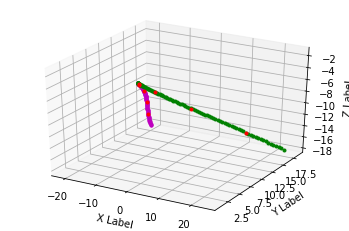

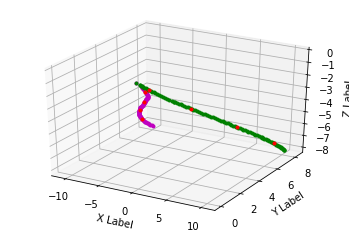

In [177]:
ffx = []
ffy = []
ffz = []
ffvx = []
ffvy = []
ffvz = []
for i in range(hidden_state_num):
    ffx.append(model.means_[i][0])
    ffy.append(model.means_[i][1])
    ffz.append(model.means_[i][2])
    ffvx.append(model.means_[i][3])
    ffvy.append(model.means_[i][4])
    ffvz.append(model.means_[i][5])

fig = plt.figure()
dx = fig.gca(projection='3d')
dx.set_xlabel('X Label')
dx.set_ylabel('Y Label')
dx.set_zlabel('Z Label')
#dx.plot(x, y, z, '.', label='position')
dx.plot(otx, oty, otz, 'm.', label='positionO')
dx.plot(ctx, cty, ctz, 'g.', label='positionC')
dx.plot(ffx, ffy, ffz, 'r.')

fig = plt.figure()
ddx = fig.gca(projection='3d')
ddx.set_xlabel('X Label')
ddx.set_ylabel('Y Label')
ddx.set_zlabel('Z Label')
#ddx.plot(v_x, v_y, v_z, '.', label='velocity')
ddx.plot(ovx, ovy, ovz, 'm.', label='velocityO')
ddx.plot(cvx, cvy, cvz, 'g.', label='velocityC')
ddx.plot(ffvx, ffvy, ffvz, 'r.')

In [36]:
print("Demonstration Type 1 with no noise:")
print("End Position: ", x[-1],y[-1],z[-1])
print("End Velocity: ", v_x[-1],v_y[-1],v_z[-1])
print("Demonstration Type 2 with no noise:")
print("End Position: ", mx[-1],my[-1],mz[-1])
print("End Velocity: ", v_mx[-1],v_my[-1],v_mz[-1])

Demonstration Type 1 with no noise:
End Position:  -8.663487999999997 -14.9984 -12.721599999999999
End Velocity:  -0.15840000000000032 -0.08000000000000007 -6.92
Demonstration Type 2 with no noise:
End Position:  12.663487999999997 -14.9984 -12.721599999999999
End Velocity:  0.15840000000000032 -0.08000000000000007 -6.92

Reproduction Results:
Calinon:
End Position:  [ 12.28390166 -14.99417433 -13.34809585]
End Velocity:  [-0.12366587 -0.02868647 -7.02350092]

Us:
End Position:  [ 12.28390166 -14.99417433 -13.34809585]
End Velocity:  [-0.12366587 -0.02868647 -7.02350092]


In [13]:
#file = open('probs.txt','w') 
#
#for each in probs:
#    file.write(str(each))
#    file.write('\n')
# 
#file.close() 

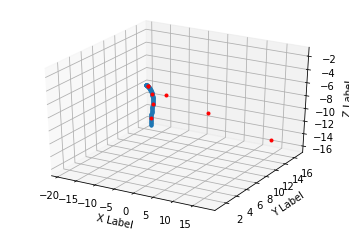

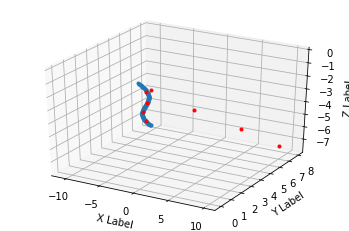

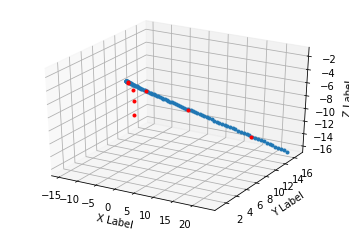

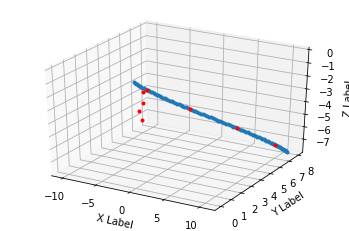

In [178]:
#Type 1
fig = plt.figure()
xx = fig.gca(projection='3d')
xx.set_xlabel('X Label')
xx.set_ylabel('Y Label')
xx.set_zlabel('Z Label')
xx.plot(x, y, z, '.', label='position')
xx.plot(ffx, ffy, ffz, 'r.')

fig = plt.figure()
xd = fig.gca(projection='3d')
xd.set_xlabel('X Label')
xd.set_ylabel('Y Label')
xd.set_zlabel('Z Label')
xd.plot(v_x, v_y, v_z, '.', label='velocity')
xd.plot(ffvx, ffvy, ffvz, 'r.')

#Type 2
fig = plt.figure()
mxx = fig.gca(projection='3d')
mxx.set_xlabel('X Label')
mxx.set_ylabel('Y Label')
mxx.set_zlabel('Z Label')
mxx.plot(mx, my, mz, '.', label='position')
mxx.plot(ffx, ffy, ffz, 'r.')

fig = plt.figure()
mxd = fig.gca(projection='3d')
mxd.set_xlabel('X Label')
mxd.set_ylabel('Y Label')
mxd.set_zlabel('Z Label')
mxd.plot(v_mx, v_my, v_mz, '.', label='velocity')
mxd.plot(ffvx, ffvy, ffvz, 'r.')

In [179]:
print((x2[0] + x3[0] + x4[0] + x5[0] + mx2[0] + mx3[0] + mx4[0] + mx5[0])/8)
print((y2[0] + y3[0] + y4[0] + y5[0] + my2[0] + my3[0] + my4[0] + my5[0])/8)
print((z2[0] + z3[0] + z4[0] + z5[0] + mz2[0] + mz3[0] + mz4[0] + mz5[0])/8)

2.011634050172951
0.9965313762921082
-1.0004277283018732


In [180]:
model.means_

array([[ -6.10147891,   7.88297375,  -7.83548312,  -7.71612462,
          5.25406059,  -5.25406059],
       [  3.89199128,   3.19482662,  -3.24980948,   3.35020778,
          2.96384429,  -2.96384429],
       [ 17.7781771 ,  13.02478813, -13.0799099 ,  10.0479221 ,
          6.95852165,  -6.95852165],
       [  2.14259001,   1.23765414,  -1.27856664,   0.47708417,
          0.84902658,  -0.84902658],
       [  1.70247726,   1.55194863,  -1.50492814,  -0.95070323,
          1.36115729,  -1.36115729],
       [  9.06170713,   7.10623447,  -7.16139305,   7.17422781,
          4.95870475,  -4.95870475],
       [-14.25194244,  13.40506939, -13.35787865, -10.15625183,
          7.06004196,  -7.06004196],
       [ -0.64844109,   3.90784203,  -3.86048469,  -4.15635937,
          3.39550845,  -3.39550845]])